In [11]:
import numpy as np

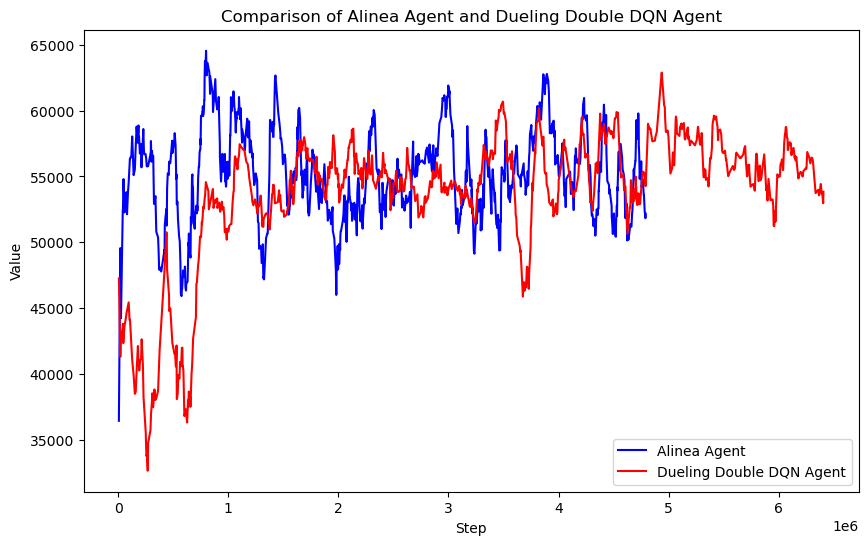

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files
file1_path = '/Users/cheimamezdour/Projects/PFE/DQN-ITSCwPD/analysis/data/J7_TLS_AlineaAgent_lr0.0001.csv'
file2_path = '/Users/cheimamezdour/Projects/PFE/DQN-ITSCwPD/analysis/data/J7_TLS_DuelingDoubleDQNAgent_lr0.0001-3.csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Extract the relevant columns (Step and Value)
steps1 = df1['Step']
values1 = df1['Value']

steps2 = df2['Step']
values2 = df2['Value']

# Plot the two datasets on the same figure
plt.figure(figsize=(10, 6))
plt.plot(steps1, values1, label='Alinea Agent', color='blue')
plt.plot(steps2, values2, label='Dueling Double DQN Agent', color='red')

# Adding titles and labels
plt.title('Comparison of Alinea Agent and Dueling Double DQN Agent')
plt.xlabel('Step')
plt.ylabel('Value')

# Show the legend to differentiate between the two datasets
plt.legend()

# Display the plot
plt.show()


### After Smoothing 

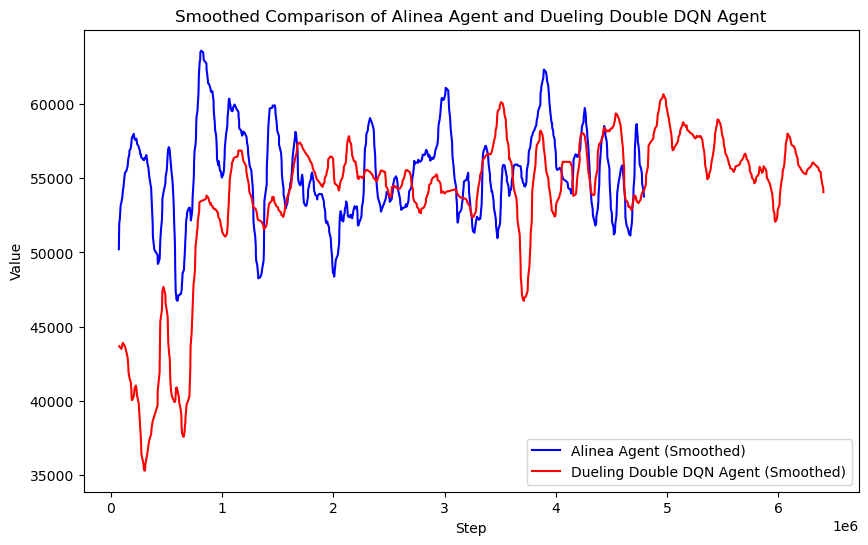

In [13]:
# Applying a simple moving average (smoothing) to the values for both datasets
window_size = 10  # You can change the window size for different levels of smoothing

# Apply rolling mean to smooth the values
smoothed_values1 = values1.rolling(window=window_size).mean()
smoothed_values2 = values2.rolling(window=window_size).mean()

# Plot the smoothed datasets on the same figure with different colors for comparison
plt.figure(figsize=(10, 6))
plt.plot(steps1, smoothed_values1, label='Alinea Agent (Smoothed)', color='blue')
plt.plot(steps2, smoothed_values2, label='Dueling Double DQN Agent (Smoothed)', color='red')

# Adding titles and labels
plt.title('Smoothed Comparison of Alinea Agent and Dueling Double DQN Agent')
plt.xlabel('Step')
plt.ylabel('Value')

# Show the legend to differentiate between the two datasets
plt.legend()

# Display the plot
plt.show()


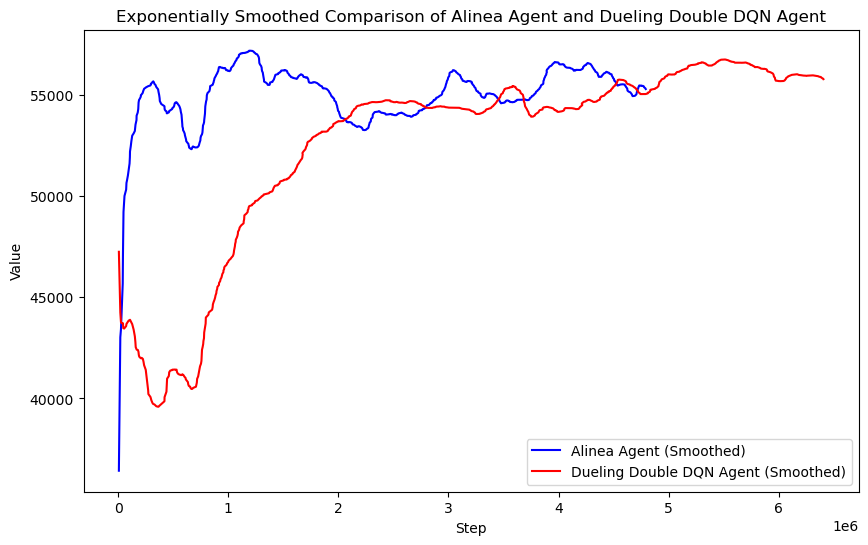

In [14]:
# Read the CSV files into DataFrames
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Extract the relevant columns (Step and Value)
steps1 = df1['Step']
values1 = df1['Value']

steps2 = df2['Step']
values2 = df2['Value']

# Define the smoothing factor
# Calculate the exponential moving average (EMA) for smoothing
smoothing_factor = 0.99
smoothed_values1 = values1.ewm(alpha=1-smoothing_factor).mean()
smoothed_values2 = values2.ewm(alpha=1-smoothing_factor).mean()

# Plot the smoothed datasets
plt.figure(figsize=(10, 6))
plt.plot(steps1, smoothed_values1, label='Alinea Agent (Smoothed)', color='blue')
plt.plot(steps2, smoothed_values2, label='Dueling Double DQN Agent (Smoothed)', color='red')

# Adding titles and labels
plt.title('Exponentially Smoothed Comparison of Alinea Agent and Dueling Double DQN Agent')
plt.xlabel('Step')
plt.ylabel('Value')

# Show the legend
plt.legend()

# Display the plot
plt.show()

### each plot alone , before and after smoothing

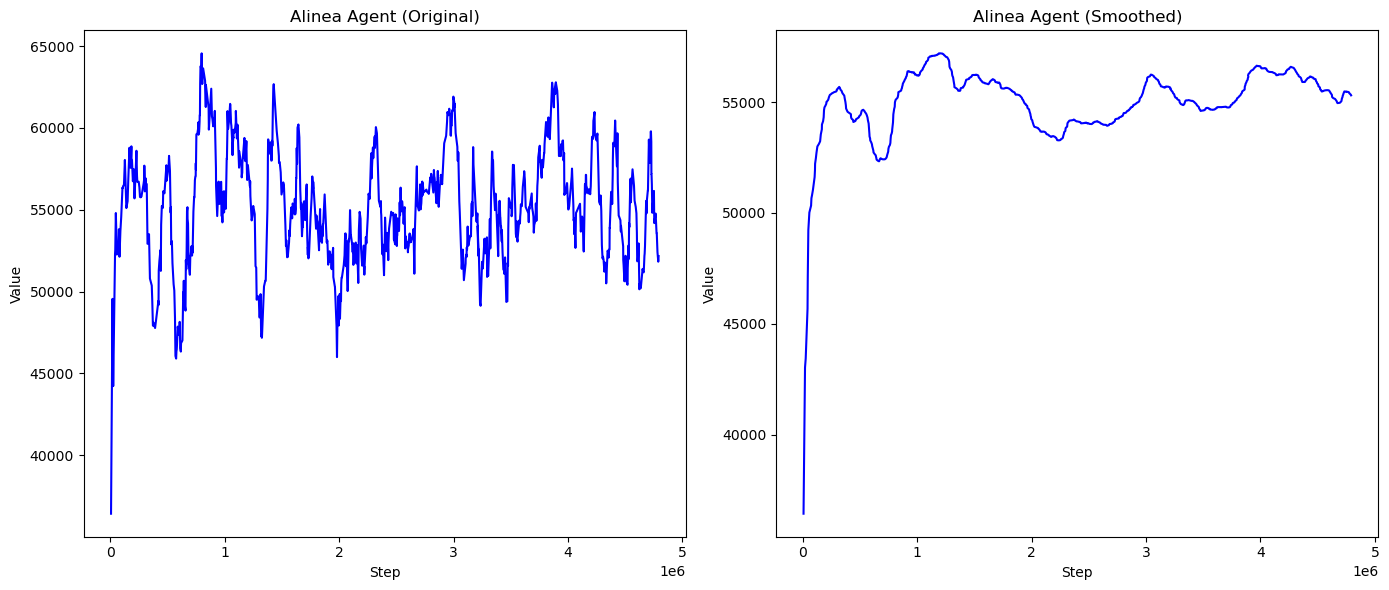

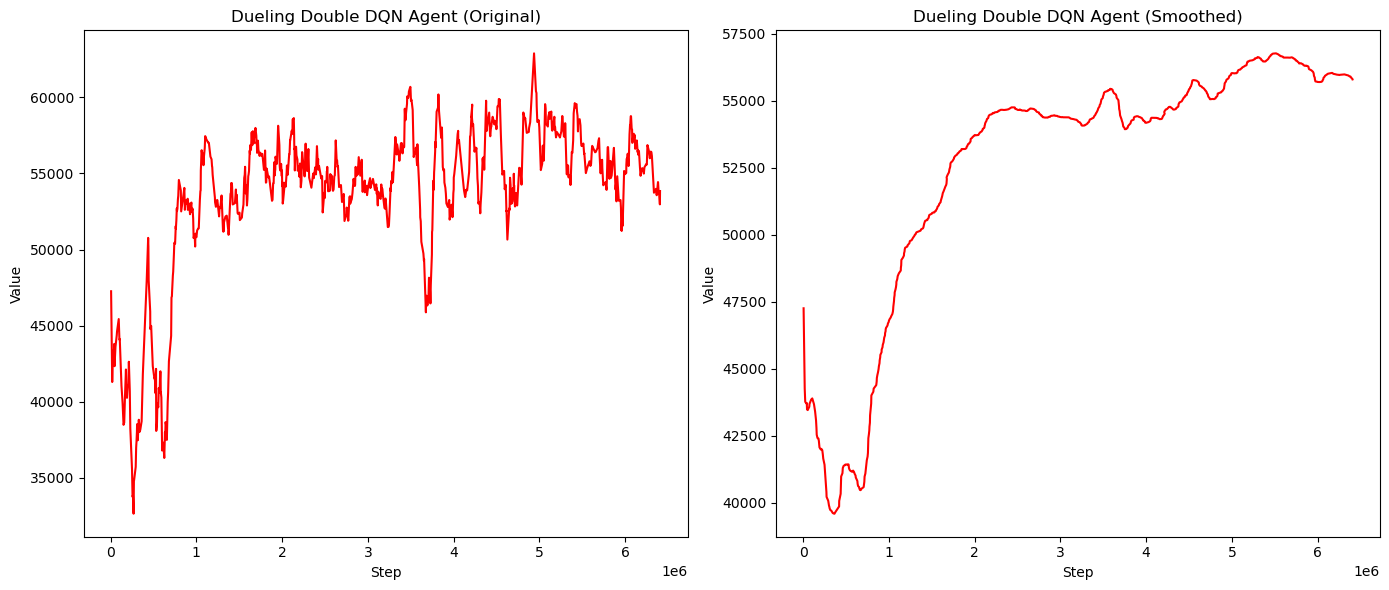

In [15]:
# Plot the original and smoothed values for both datasets separately

# Plot for Alinea Agent
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
plt.plot(steps1, values1, label='Alinea Agent (Original)', color='blue')
plt.title('Alinea Agent (Original)')
plt.xlabel('Step')
plt.ylabel('Value')

# Smoothed
plt.subplot(1, 2, 2)
plt.plot(steps1, smoothed_values1, label='Alinea Agent (Smoothed)', color='blue')
plt.title('Alinea Agent (Smoothed)')
plt.xlabel('Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Plot for Dueling Double DQN Agent
plt.figure(figsize=(14, 6))

# Original
plt.subplot(1, 2, 1)
plt.plot(steps2, values2, label='Dueling Double DQN Agent (Original)', color='red')
plt.title('Dueling Double DQN Agent (Original)')
plt.xlabel('Step')
plt.ylabel('Value')

# Smoothed
plt.subplot(1, 2, 2)
plt.plot(steps2, smoothed_values2, label='Dueling Double DQN Agent (Smoothed)', color='red')
plt.title('Dueling Double DQN Agent (Smoothed)')
plt.xlabel('Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


#### Travel time 

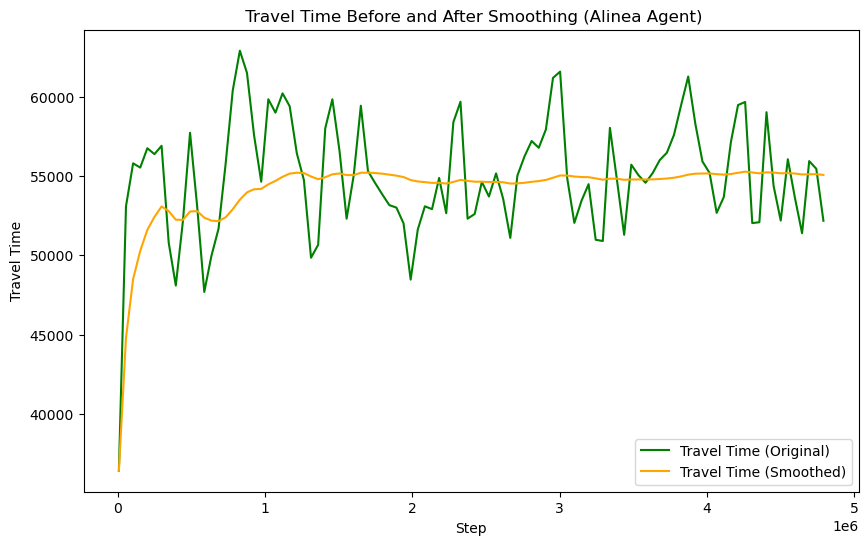

In [16]:
# Load the predicted CSV file
df = pd.read_csv("/Users/cheimamezdour/Projects/PFE/DQN-ITSCwPD/analysis/data/travel_time_alinea.csv")

# Extract the relevant columns for plotting
steps_pred = df['Step']
travel_time = df['Travel_Time']

# Apply exponential smoothing to the predicted travel times
smoothing_factor = 0.99
smoothed_travel_time = travel_time.ewm(alpha=1-smoothing_factor).mean()

# Plot the predicted travel times before and after smoothing
plt.figure(figsize=(10, 6))

# Original predicted travel time
plt.plot(steps_pred, travel_time, label='Travel Time (Original)', color='green')

# Smoothed predicted travel time
plt.plot(steps_pred, smoothed_travel_time, label='Travel Time (Smoothed)', color='orange')

# Adding titles and labels
plt.title(' Travel Time Before and After Smoothing (Alinea Agent)')
plt.xlabel('Step')
plt.ylabel('Travel Time')
plt.legend()

# Display the plot
plt.show()


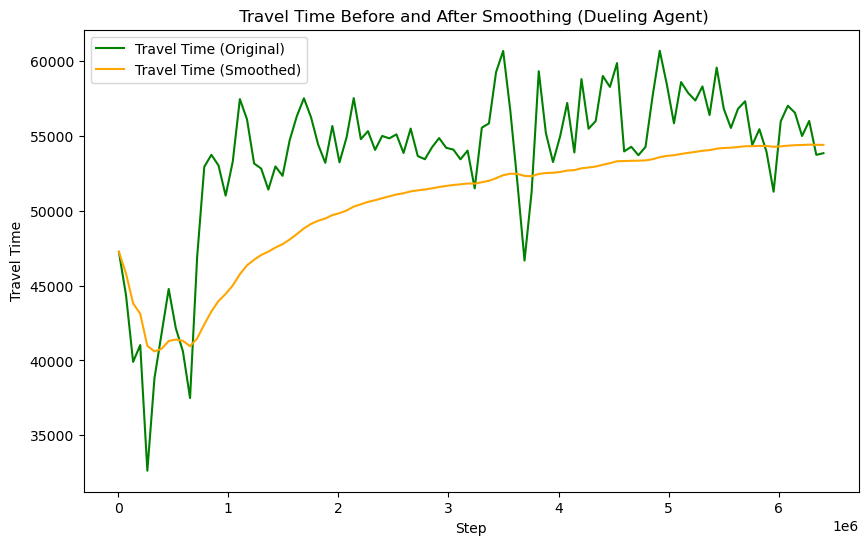

In [17]:
# Load the  CSV file
df = pd.read_csv("/Users/cheimamezdour/Projects/PFE/DQN-ITSCwPD/analysis/data/travel_time_dueling.csv")

# Extract the relevant columns for plotting
steps_pred = df['Step']
travel_time = df['Travel_Time']

# Apply exponential smoothing to the predicted travel times
smoothing_factor = 0.99
smoothed_travel_time = travel_time.ewm(alpha=1-smoothing_factor).mean()

# Plot the predicted travel times before and after smoothing
plt.figure(figsize=(10, 6))

# Original predicted travel time
plt.plot(steps_pred, travel_time, label='Travel Time (Original)', color='green')

# Smoothed predicted travel time
plt.plot(steps_pred, smoothed_travel_time, label='Travel Time (Smoothed)', color='orange')

# Adding titles and labels
plt.title(' Travel Time Before and After Smoothing (Dueling Agent)')
plt.xlabel('Step')
plt.ylabel('Travel Time')
plt.legend()

# Display the plot
plt.show()

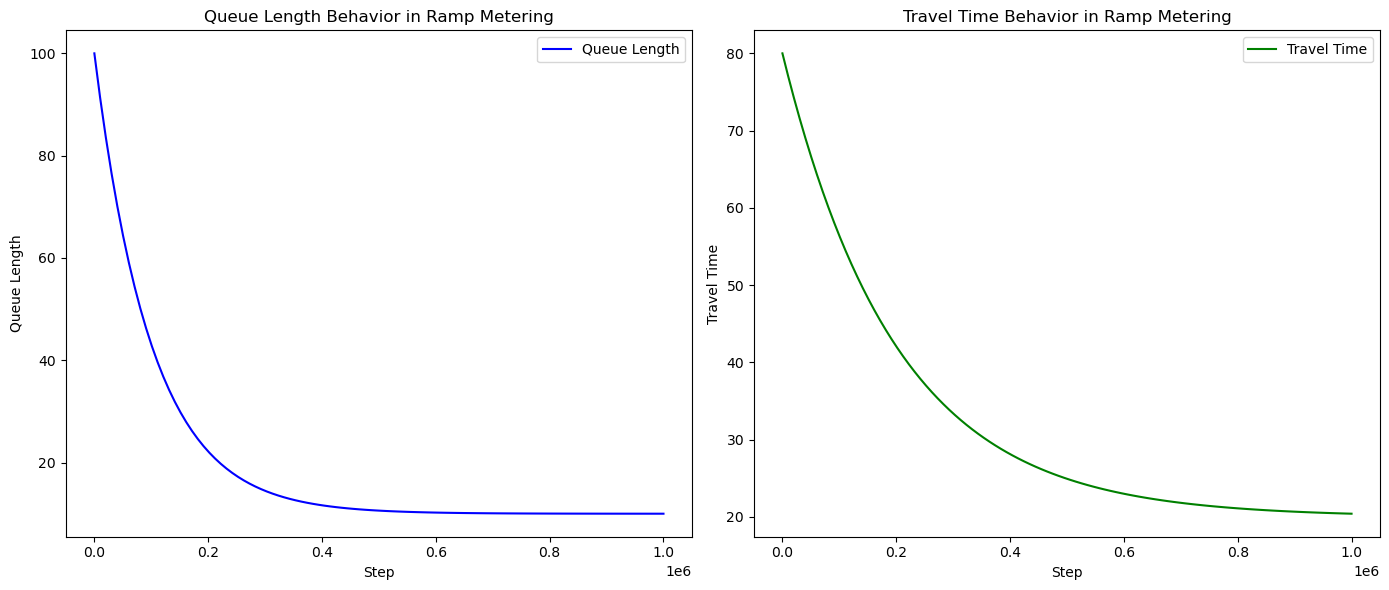

In [18]:
# Generate synthetic data to simulate the behavior of queue length and travel time in ramp metering optimization

# Steps
steps_ramp = np.linspace(0, 1_000_000, 100)

# Simulate Queue Length behavior:
# Queue length initially increases, then decreases as ramp metering optimizes traffic
initial_queue_length = 100  # Initial high queue length
final_queue_length = 10  # Final acceptable queue length
queue_length_ramp = initial_queue_length + (final_queue_length - initial_queue_length) * (1 - np.exp(-0.00001 * steps_ramp))

# Simulate Travel Time behavior:
# Travel time steadily decreases as traffic is optimized on the highway
initial_travel_time = 80  # Initial high travel time
final_travel_time = 20  # Final optimized travel time
travel_time_ramp = final_travel_time + (initial_travel_time - final_travel_time) * np.exp(-0.000005 * steps_ramp)

# Plot both Queue Length and Travel Time

plt.figure(figsize=(14, 6))

# Plot for Queue Length
plt.subplot(1, 2, 1)
plt.plot(steps_ramp, queue_length_ramp, label='Queue Length', color='blue')
plt.title('Queue Length Behavior in Ramp Metering')
plt.xlabel('Step')
plt.ylabel('Queue Length')
plt.legend()

# Plot for Travel Time
plt.subplot(1, 2, 2)
plt.plot(steps_ramp, travel_time_ramp, label='Travel Time', color='green')
plt.title('Travel Time Behavior in Ramp Metering')
plt.xlabel('Step')
plt.ylabel('Travel Time')
plt.legend()

plt.tight_layout()
plt.show()


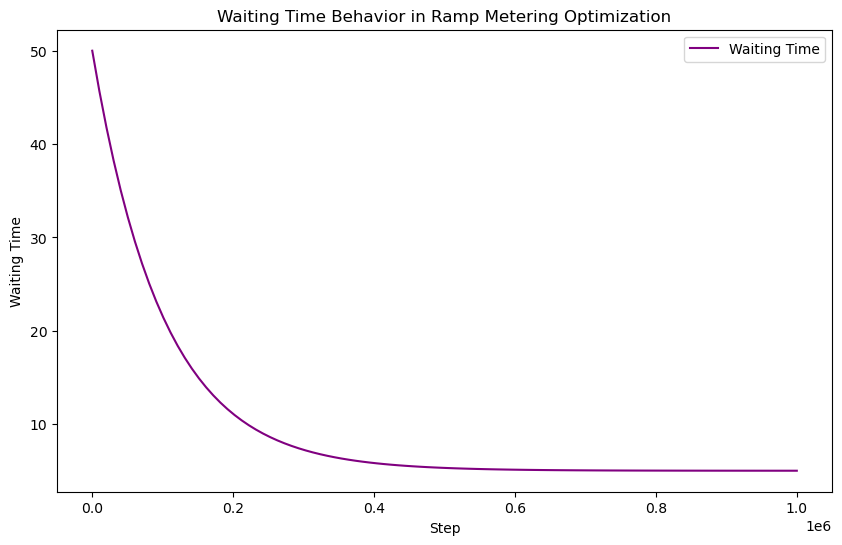

In [19]:
# Generate synthetic data to simulate waiting time behavior in ramp metering optimization

# Waiting time initially increases as ramp metering starts, then decreases as the system optimizes
initial_waiting_time = 50  # Initial waiting time at the ramp
final_waiting_time = 5  # Final acceptable waiting time after optimization
waiting_time_ramp = initial_waiting_time + (final_waiting_time - initial_waiting_time) * (1 - np.exp(-0.00001 * steps_ramp))

# Plot the waiting time over steps
plt.figure(figsize=(10, 6))
plt.plot(steps_ramp, waiting_time_ramp, label='Waiting Time', color='purple')

# Adding titles and labels
plt.title('Waiting Time Behavior in Ramp Metering Optimization')
plt.xlabel('Step')
plt.ylabel('Waiting Time')
plt.legend()

# Display the plot
plt.show()
